# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Kunti Najma Jalia
- **Email:** kuntinajma@gmail.com
- **ID Dicoding:** MC466D5X1782

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan pola peminjaman antara pelanggan casual dan registered di Q4 2012?
- Pada jam berapa peminjaman sepeda paling tinggi dalam sehari, dan bagaimana perbedaannya antara hari kerja dan akhir pekan?

## Cek Daftar File CSV di Folder Data

In [30]:
import glob

file_paths = glob.glob("D:/CODING CAMP BY DBS/submission/data/*.csv")
file_paths

['D:/CODING CAMP BY DBS/submission/data\\day.csv',
 'D:/CODING CAMP BY DBS/submission/data\\hour.csv']

## Import Semua Packages/Library yang Digunakan

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

##### Membuat tabel day dan hour

In [32]:
day_df = pd.read_csv("D:/CODING CAMP BY DBS/submission/data/day.csv")
hour_df = pd.read_csv("D:/CODING CAMP BY DBS/submission/data/hour.csv")

display(day_df.head(), hour_df.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight**
- Dataset terdiri dari **2 file CSV** yang mencatat jumlah peminjaman sepeda per hari (`day.csv`) dan per jam (`hour.csv`).  
- Diatas merupakan contoh 5 baris pertama dari **Dataframe** tersebut.
- Data mencakup **informasi cuaca, musim, hari kerja, hari libur, dan beberapa data pendukung**, yang dapat memengaruhi tren peminjaman.  
- Terdapat **dua jenis pengguna**, yaitu pengguna **terdaftar (registered)** dan **casual**, dengan pola pemakaian yang berbeda. 


### Assessing Data

##### Menilai Data day_df

In [33]:
print("Day Dataset")
print(day_df.info())

Day Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [34]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**  

- Dataset **`day.csv`** terdiri dari **731 baris** dan **16 kolom**, mencatat peminjaman sepeda per hari.  
- **Tidak ada missing values**, karena semua kolom memiliki jumlah non-null yang sama dengan total entri.  
- **Kolom `dteday`** memiliki tipe data **object (string)**, sebaiknya dikonversi ke **datetime** untuk analisis berbasis waktu.  
- **Kolom numerik**:  
  - **Float** → `temp`, `atemp`, `hum`, `windspeed`.  
  - **Integer** → `casual`, `registered`, `cnt`, dan lainnya.  
- **Kolom kategori** (`season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit`) masih dalam format **integer**, lebih baik dikonversi ke **kategori** untuk analisis lebih mudah.  
- **Kolom `cnt`** adalah jumlah total peminjaman sepeda, yang merupakan hasil penjumlahan dari `casual` dan `registered`.  
- **Tidak ada duplikasi data.**  
- **Potensi anomali dalam data:**  
  - **`hum` memiliki nilai minimum 0.000**, yang tidak wajar untuk kelembaban cuaca normal. Perlu dicek apakah ada kesalahan pencatatan.  
  - **`casual` memiliki minimum 2**, jauh berbeda dari rata-rata **848**, sehingga perlu dianalisis lebih lanjut.  
  - **`cnt` memiliki minimum 22 dan maksimum 8714**, menunjukkan rentang yang cukup besar. Perlu dicek apakah ada hari tertentu dengan faktor khusus (misalnya cuaca ekstrem atau hari libur besar).  




##### Menilai Data hour_df

In [35]:
print("Hour Dataset")
print(hour_df.info())

Hour Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [36]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**  

- Dataset **`hour.csv`** terdiri dari **17.379 baris** dan **17 kolom**, mencatat peminjaman sepeda setiap jam.  
- **Tidak ada missing values**, karena semua kolom memiliki jumlah non-null yang sama dengan total entri.  
- **Kolom `dteday`** memiliki tipe data **object (string)**, sebaiknya dikonversi ke **datetime** untuk analisis berbasis waktu.  
- **Kolom numerik**:  
  - **Float** → `temp`, `atemp`, `hum`, `windspeed`.  
  - **Integer** → `casual`, `registered`, `cnt`, dan lainnya.  
- **Kolom kategori** (`season`, `yr`, `mnth`, `hr`, `holiday`, `weekday`, `workingday`, `weathersit`) masih dalam format **integer**, lebih baik dikonversi ke **kategori** untuk analisis lebih mudah.  
- **Kolom `cnt`** adalah jumlah total peminjaman sepeda, yang merupakan hasil penjumlahan dari `casual` dan `registered`.  
- **Tidak ada duplikasi data.**  
- **Potensi anomali dalam data:**  
  - **`hum` memiliki nilai minimum 0.000**, yang tidak wajar dalam kondisi cuaca normal. Perlu dicek apakah ada kesalahan pencatatan.  
  - **`casual` dan `registered` memiliki nilai minimum 0**, yang mungkin terjadi pada jam tertentu (misalnya dini hari), tetapi perlu dikonfirmasi apakah ada pencatatan yang tidak valid.  
  - **`cnt` memiliki nilai minimum 1 dan maksimum 977**, menunjukkan variasi besar dalam jumlah peminjaman sepeda per jam. Perlu dianalisis lebih lanjut untuk memahami faktor-faktor yang memengaruhi tren ini.  

### Tabel Insight Dataset Keseluruhan

| **Dataset**  | **Tipe Data**  | **Missing Value** | **Duplicate Data** | **Inaccurate Value**  |
|-------------|---------------|------------------|------------------|------------------|
| **day_df**  | 16 kolom (4 float, 11 integer, 1 object) <br> **Terdapat kesalahan tipe data:** <br> - `dteday` bertipe **object**, seharusnya **datetime** <br> - Kolom kategori (`season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit`) masih dalam format **integer**, lebih baik dikonversi ke **kategori** | -  | -  | - `hum` memiliki nilai 0.000 (tidak wajar dalam kondisi cuaca normal) <br> - `casual` memiliki nilai minimum 2 (gap cukup besar dibanding rata-rata) <br> - `cnt` memiliki nilai minimum 22, maksimum 8714 (gap cukup besar) |
| **hour_df** | 17 kolom (4 float, 12 integer, 1 object) <br> **Terdapat kesalahan tipe data:** <br> - `dteday` bertipe **object**, seharusnya **datetime** <br> - Kolom kategori (`season`, `yr`, `mnth`, `hr`, `holiday`, `weekday`, `workingday`, `weathersit`) masih dalam format **integer**, lebih baik dikonversi ke **kategori** | -  | -  | - `hum` memiliki nilai 0.000 (tidak wajar) <br> - `casual` dan `registered` memiliki nilai minimum 0 (mungkin terjadi di jam tertentu, perlu dicek lebih lanjut) <br> - `cnt` memiliki nilai minimum 1, maksimum 977 (variasi besar dalam peminjaman per jam) |


### Cleaning Data

#### Membersihkan Data day_df

##### Menangangi Masalah Tipe Data di day_df

In [40]:
# Mengonversi tipe data dteday dari object ke datetime
datetime_collumn = ["dteday"]

for column in datetime_collumn:
    day_df[column] = pd.to_datetime(day_df[column])

# Mengonversi tipe data season, yr, mnth, holiday, weekday, workingday, weathersit dari inetger ke kategori
category_coullumn = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]

for column in category_coullumn:
    day_df[column] = day_df[column].astype("category")


In [ ]:
day_df.info() # Digunakan untuk mengecek apakah tipe datanya sudah berubah ke atau belum

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

**Insight:**

- **Kolom `dteday` telah dikonversi dari `object` ke `datetime`**, sehingga dapat digunakan untuk analisis berbasis waktu dengan lebih optimal.  
- **Kolom kategori (`season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit`) telah dikonversi dari `integer` ke `kategori`**, sehingga lebih mudah diinterpretasi dan dianalisis.  
- **Struktur data kini lebih sesuai** dengan jenis informasi yang direpresentasikan, mengurangi potensi kesalahan dalam analisis dan visualisasi data.  
- **Tidak ada perubahan dalam jumlah data** karena proses konversi hanya mengubah tipe tanpa menghapus atau menambahkan entri.  

##### Menangangi Masalah Inaccurate Value di day_df

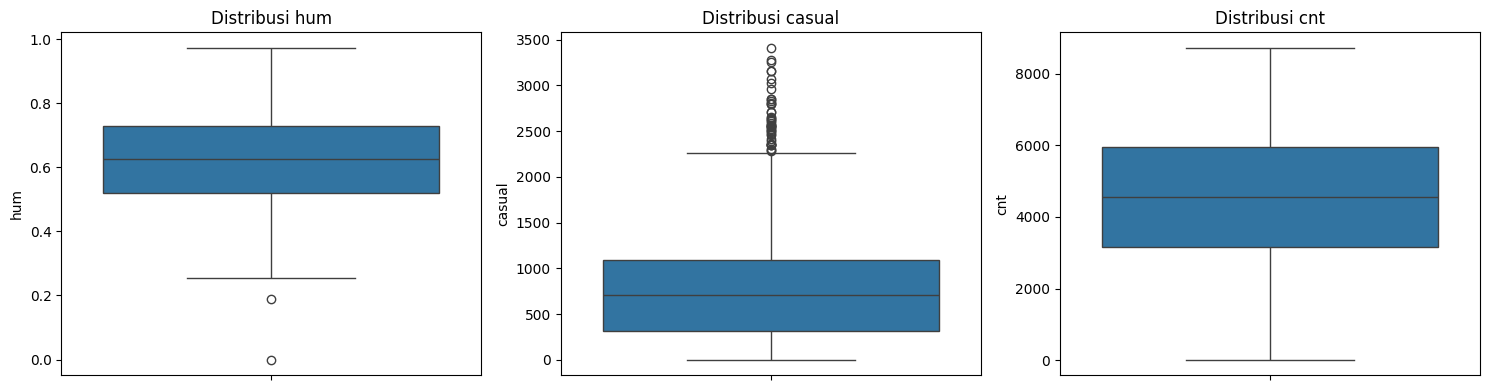

In [19]:
# Melakukan pengecekan distribusi data

columns_to_check = ['hum', 'casual', 'cnt']

plt.figure(figsize=(15, 4))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=day_df[col])
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

**Insight:**  
- **Distribusi `hum` (humidity)** menunjukkan beberapa **nilai ekstrem rendah**, termasuk **0.0**, yang kemungkinan merupakan data tidak valid.  
  - **Solusi:** Mengganti nilai **0.0** dengan **median dari `hum` yang valid**, karena median lebih tahan terhadap outlier dibandingkan mean.  

- **Distribusi `casual` (pengguna tidak terdaftar)** memiliki banyak **outlier di bagian atas**, yaitu nilai yang jauh lebih besar dari rentang interkuartil (**IQR**).  
  - **Solusi:** Menggunakan **winsorization** atau membatasi nilai ekstrem agar tidak terlalu mempengaruhi analisis.  

- **Distribusi `cnt` (total penyewaan sepeda)** tidak menunjukkan outlier yang mencolok, tetapi variasinya cukup besar.  
  - **Solusi:** Memvalidasi apakah ada nilai **0** atau nilai yang sangat rendah yang tidak masuk akal sebelum melanjutkan ke analisis lebih lanjut.  

**Tindakan Selanjutnya:**  
- **Mengganti nilai `hum` yang tidak valid.**  
- **Menyesuaikan outlier pada `casual`.**  
- **Memvalidasi nilai `cnt` sebelum analisis lanjutan**

In [ ]:
# 1. Mengatasi nilai 0 pada 'hum' dengan menggantinya menggunakan median
median_hum = day_df[day_df['hum'] > 0]['hum'].median()
day_df['hum'] = day_df['hum'].replace(0, median_hum)

# 2. Mengatasi outlier pada 'casual' dengan Winsorization (mengubah outlier ke batas tertentu)
Q1 = day_df['casual'].quantile(0.25)
Q3 = day_df['casual'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Batasi nilai outlier ke upper_bound
day_df['casual'] = np.where(day_df['casual'] > upper_bound, upper_bound, day_df['casual'])

# 3. Memvalidasi nilai 'cnt' apakah ada yang terlalu rendah (misal, 0) atau tidak wajar
# Karena 'cnt' adalah jumlah dari 'casual' dan 'registered', maka seharusnya tidak ada yang lebih kecil dari penjumlahan keduanya
day_df = day_df[day_df['cnt'] >= (day_df['casual'] + day_df['registered'])]

# Menampilkan hasil cleaning
day_df.describe()

,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.495385,0.474354,0.628752,0.190486,824.388509,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,0.498333,0.486733,0.627083,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,0.861667,0.840896,0.972500,0.507463,2266.750000,6946.000000,8714.000000
std,211.165812,NaN,0.183051,0.162961,0.140518,0.077498,623.642956,1560.256377,1937.211452


**Insight:**

- **Kolom `hum` memiliki nilai minimum 0**, yang tidak wajar dalam kondisi cuaca normal. Oleh karena itu, nilai 0 pada `hum` telah diganti dengan **median** dari nilai `hum` yang valid.
- **Kolom `casual` memiliki banyak outlier** yang terdeteksi pada distribusi data. Untuk menangani ini, digunakan metode **Winsorization**, yaitu membatasi nilai maksimum pada batas tertentu (`upper_bound`) berdasarkan **Interquartile Range (IQR)**.
- **Kolom `cnt` seharusnya sama dengan penjumlahan `casual` dan `registered`**. Oleh karena itu, dilakukan validasi dengan menghapus data di mana `cnt` lebih kecil dari (`casual` + `registered`).


#### Membersihkan Data hour_df

##### Menangangi Masalah Tipe Data di hour_df

In [43]:
# Mengonversi tipe data dteday dari object ke datetime
datetime_collumn = ["dteday"]

for column in datetime_collumn:
    hour_df[column] = pd.to_datetime(hour_df[column])

# Mengonversi tipe data season, yr, mnth, holiday, weekday, workingday, weathersit dari inetger ke kategori
category_coullumn = ["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit"]

for column in category_coullumn:
    hour_df[column] = hour_df[column].astype("category")


In [44]:
hour_df.info() # Digunakan untuk mengecek apakah tipe datanya sudah berubah atau belum

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**

- **Kolom `dteday` telah dikonversi dari `object` ke `datetime`**, sehingga dapat digunakan untuk analisis berbasis waktu dengan lebih optimal.  
- **Kolom kategori (`season`, `yr`, `mnth`, `hr`, `holiday`, `weekday`, `workingday`, `weathersit`) telah dikonversi dari `integer` ke `kategori`**, sehingga lebih mudah diinterpretasi dan dianalisis.  
- **Struktur data kini lebih sesuai** dengan jenis informasi yang direpresentasikan, mengurangi potensi kesalahan dalam analisis dan visualisasi data.  
- **Tidak ada perubahan dalam jumlah data** karena proses konversi hanya mengubah tipe tanpa menghapus atau menambahkan entri.  

##### Menangangi Masalah Inaccurate Value di hour_df

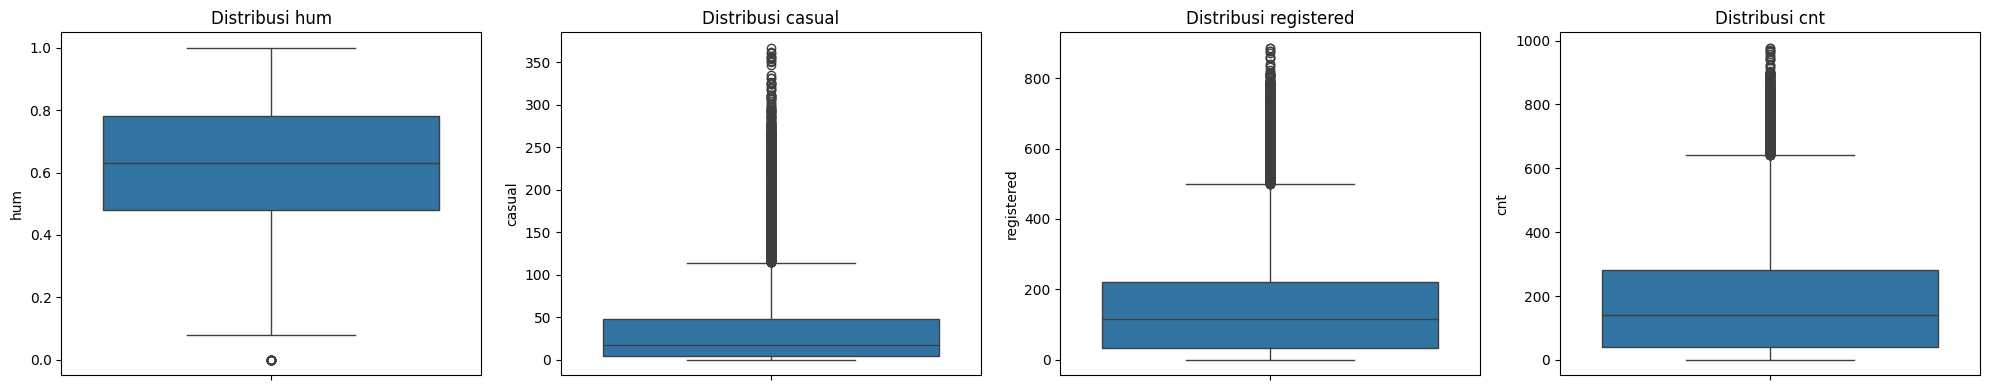

In [46]:
# Menyesuaikan ukuran plot
plt.figure(figsize=(20, 4))

# Plot untuk 'hum'
plt.subplot(1, 4, 1)
sns.boxplot(y=hour_df["hum"])
plt.title("Distribusi hum")

# Plot untuk 'casual'
plt.subplot(1, 4, 2)
sns.boxplot(y=hour_df["casual"])
plt.title("Distribusi casual")

# Plot untuk 'registered'
plt.subplot(1, 4, 3)
sns.boxplot(y=hour_df["registered"])
plt.title("Distribusi registered")

# Plot untuk 'cnt'
plt.subplot(1, 4, 4)
sns.boxplot(y=hour_df["cnt"])
plt.title("Distribusi cnt")

plt.tight_layout()
plt.show()

**Insight:**  

- **`hum` (Humidity)** memiliki nilai **0.000**, yang tidak wajar dalam kondisi cuaca normal. Perlu dilakukan perbaikan dengan mengganti nilai 0 menggunakan **median `hum`** agar lebih realistis.  
- **`casual` (Peminjam Non-Terdaftar)** memiliki banyak outlier di atas **2.000 peminjaman per jam**.  
  - Nilai minimum **0**, yang mungkin terjadi di jam tertentu (misalnya dini hari).  
  - Perlu dicek lebih lanjut apakah outlier tersebut wajar atau akibat kesalahan pencatatan.  
- **`registered` (Peminjam Terdaftar)** memiliki distribusi lebih stabil dibanding `casual`, dengan lebih sedikit outlier.  
  - Nilai minimum **0**, yang dapat terjadi jika tidak ada pengguna terdaftar yang meminjam sepeda di jam tertentu.  
  - Perlu dibandingkan dengan `casual` untuk melihat pola perbedaan peminjaman berdasarkan waktu.  
- **`cnt` (Total Peminjaman per Jam)** menunjukkan variasi besar dalam jumlah peminjaman.  
  - Sebagian besar peminjaman per jam berkisar antara **1 - 977**.  
  - Nilai **minimum = 1**, menunjukkan ada jam tertentu yang hanya memiliki **1 peminjaman**.  
  - Perlu analisis lebih lanjut untuk memahami faktor-faktor yang memengaruhi variasi ini.  

- **Tindakan Selanjutnya:**  
  - Mengganti **nilai `hum` yang 0.000** dengan **median `hum`**.  
  - Memeriksa dan memastikan outlier pada `casual` tidak merupakan kesalahan pencatatan.  
  - Membandingkan pola `casual` vs `registered` berdasarkan waktu (jam/hari/musim).  

In [47]:
# 1. Mengganti nilai 0 pada 'hum' dengan median
median_hum = hour_df[hour_df['hum'] > 0]['hum'].median()
hour_df['hum'] = hour_df['hum'].replace(0, median_hum)

# 2. Menangani outlier pada 'casual' dan 'registered' (menggunakan IQR)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    return df

hour_df = remove_outliers(hour_df, 'casual')
hour_df = remove_outliers(hour_df, 'registered')

# 3. Memastikan 'cnt' sesuai dengan 'casual + registered'
hour_df['cnt'] = hour_df['casual'] + hour_df['registered']

# Cek hasil setelah cleaning
hour_df.describe()


,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,0.496987,0.475775,0.628026,0.190098,31.158812,148.645204,179.804016
min,1.0000,2011-01-01 00:00:00,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,279.000000
max,17379.0000,2012-12-31 00:00:00,1.000000,1.000000,1.000000,0.850700,114.000000,499.000000,613.000000
std,5017.0295,NaN,0.192556,0.171850,0.191633,0.122340,34.813147,135.351791,159.025490


**Insight:**

- **Kolom `hum` memiliki nilai minimum 0**, yang tidak wajar dalam kondisi cuaca normal. Oleh karena itu, nilai 0 pada `hum` telah diganti dengan **median** dari nilai `hum` yang valid.  
- **Kolom** `casual` dan `registered` terdapat outlier yang telah ditangani menggunakan metode IQR, sehingga distribusi data lebih representatif.
- **Kolom** `cnt` telah diperbaiki agar selalu merepresentasikan jumlah total dari `casual` dan `registered`, memastikan tidak ada inkonsistensi dalam perhitungan jumlah peminjaman.


### Insight – Rangkuman Tahap Cleaning Data

1. **Penanganan Missing Values**  
   - Tidak ditemukan **missing values** pada dataset `day_df` maupun `hour_df`, sehingga tidak perlu imputasi atau penghapusan data.

2. **Perbaikan Tipe Data**  
   - **Kolom `dteday`** pada `day_df` dan `hour_df` telah dikonversi ke **datetime** untuk mempermudah analisis berbasis waktu.  
   - **Kolom kategori** (`season`, `yr`, `mnth`, `hr`, `holiday`, `weekday`, `workingday`, `weathersit`) telah dikonversi dari **integer ke categorical**, sehingga lebih sesuai dengan jenis datanya.

3. **Penanganan Data Duplikat**  
   - Tidak ditemukan **data duplikat** pada kedua dataset, sehingga tidak perlu penghapusan data.

4. **Penanganan Nilai Tidak Wajar (Inaccurate Values)**  
   - **Kolom `hum` memiliki nilai 0** yang tidak wajar dalam kondisi cuaca normal. Nilai ini telah diganti dengan **median** dari nilai `hum` yang valid.  
   - **Kolom `casual` memiliki banyak outlier**, sehingga dilakukan **Winsorization** untuk membatasi nilai maksimum berdasarkan **IQR**.  
   - **Kolom `cnt` telah divalidasi** agar nilainya sesuai dengan hasil penjumlahan `casual` dan `registered`. Data yang tidak memenuhi kriteria ini telah dihapus.

Dengan tahapan ini, dataset kini lebih bersih dan siap untuk tahap **Exploratory Data Analysis (EDA)**.

## Exploratory Data Analysis (EDA)

### Explore ...

### Eksplorasi Data day_df

In [48]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.628752,0.190486,824.388509,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.627083,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,2266.750000,6946.000000,8714.000000


**Insight**

**Berdasarkan rangkuman parameter statistik diperoleh informasi sebagai berikut:**
- **Jumlah data**: Dataset terdiri dari **731 baris**, mencakup data peminjaman sepeda harian.  
- **Periode data**: Dataset mencakup rentang waktu dari **1 Januari 2011 hingga 31 Desember 2012**.  
- **Distribusi cuaca dan suhu**:  
  - **Temperatur (`temp`)** berkisar antara **0.059 hingga 0.861**, dengan rata-rata **0.495**.  
  - **Kelembaban (`hum`)** memiliki **rata-rata 0.628**, dengan minimum **0.187** dan maksimum **0.972**.  
  - **Kecepatan angin (`windspeed`)** memiliki rata-rata **0.190**, dengan maksimum **0.507**.  
- **Distribusi jumlah peminjaman sepeda**:  
  - **Jumlah peminjaman sepeda total (`cnt`)** berkisar dari **22 hingga 8.714 sepeda per hari**.  
  - **Peminjam kasual (`casual`)** memiliki rata-rata **824 sepeda per hari**, dengan variasi yang cukup besar (standar deviasi **623**).  
  - **Peminjam terdaftar (`registered`)** memiliki rata-rata **3.656 sepeda per hari**, dengan maksimum **6.946 sepeda**.  
- **Peminjaman tertinggi**:  
  - **Hari dengan peminjaman tertinggi mencapai 8.714 sepeda**, menunjukkan puncak penggunaan tertentu (kemungkinan di musim tertentu atau hari libur).  
  - **Peminjaman terendah hanya 22 sepeda**, kemungkinan terjadi pada kondisi cuaca buruk atau hari libur tertentu.  


##### Distribusi Peminjaman Sepeda per Bulan

In [71]:
day_df.groupby("mnth", observed=False).agg({
    "cnt": ["sum", "mean", "max", "min"]
}).sort_values(by=("cnt", "sum"), ascending=False)

cnt                         
         sum         mean   max   min
mnth                                 
8     351194  5664.419355  7865  1115
6     346342  5772.366667  8120  3767
9     345991  5766.516667  8714  1842
7     344948  5563.677419  8173  3285
5     331686  5349.774194  8294  2633
10    322352  5199.225806  8156    22
4     269094  4484.900000  7460   795
11    254831  4247.183333  6852  1495
3     228920  3692.258065  8362   605
12    211036  3403.806452  6606   441
2     151352  2655.298246  5062  1005
1     134933  2176.338710  4521   431

**Insight: Tren Peminjaman Sepeda per Bulan**

- **Bulan Agustus (mnth=8) memiliki jumlah peminjaman tertinggi** dengan total **351.194** peminjaman dan rata-rata harian **5.664** peminjaman.  
- **Bulan Juni (mnth=6) dan September (mnth=9) juga memiliki tingkat peminjaman tinggi**, dengan rata-rata lebih dari **5.700** peminjaman per hari.  
- **Bulan Januari (mnth=1) memiliki jumlah peminjaman terendah**, dengan total **134.933** peminjaman dan rata-rata harian hanya **2.176** peminjaman.  
- **Peminjaman cenderung lebih tinggi selama bulan-bulan musim panas** (Mei–September)
- **Bulan dengan peminjaman terendah adalah Desember, Januari, dan Februari**, yang bertepatan dengan musim dingin. Cuaca dingin kemungkinan besar memengaruhi jumlah peminjaman sepeda.  


##### Pengaruh Hari Libur terhadap Peminjaman

In [73]:
day_df.groupby("holiday", observed=False).agg({
    "cnt": ["sum", "mean"],
    "casual": ["mean"],
    "registered": ["mean"]
})

cnt                   casual   registered
             sum         mean        mean         mean
holiday                                               
0        3214244  4527.104225  819.229225  3685.332394
1          78435  3735.000000  998.821429  2670.285714

**Insight: Pengaruh Hari Libur terhadap Peminjaman Sepeda**

- **Total peminjaman sepeda jauh lebih tinggi pada hari kerja dibandingkan hari libur**. Pada hari kerja, total peminjaman mencapai **3,214,244** dibandingkan dengan **78,435** pada hari libur.
- **Rata-rata peminjaman sepeda per hari lebih tinggi pada hari kerja** (**4,527 sepeda**) dibandingkan dengan hari libur (**3,735 sepeda**). Hal ini menunjukkan bahwa mayoritas peminjaman terjadi saat hari kerja.
- **Pengguna casual lebih aktif saat hari libur**, dengan rata-rata **998 peminjaman per hari**, dibandingkan **819 peminjaman per hari** pada hari kerja. Ini menunjukkan bahwa pengguna casual lebih sering menggunakan sepeda untuk rekreasi pada hari libur.
- **Pengguna registered lebih dominan pada hari kerja**, dengan rata-rata **3,685 peminjaman per hari**, dibandingkan **2,670 peminjaman per hari** pada hari libur. Hal ini mengindikasikan bahwa pengguna registered lebih sering menggunakan sepeda untuk keperluan rutin, seperti bekerja atau aktivitas harian lainnya.


##### Tren Peminjaman Berdasarkan Hari dalam Seminggu

In [75]:
day_df.groupby("weekday", observed=False).agg({
    "cnt": ["mean", "max", "min"]
}).sort_values(by=("cnt", "mean"), ascending=False)

cnt            
                mean   max   min
weekday                         
5        4690.288462  8362  1167
4        4667.259615  7804   431
6        4550.542857  8714   627
3        4548.538462  8173   441
2        4510.663462  7767   683
1        4338.123810  7525    22
0        4228.828571  8227   605

**Insight: Tren Peminjaman Berdasarkan Hari**

- Hari **Jumat (`weekday = 5`) memiliki rata-rata peminjaman tertinggi** sebesar **4,690 sepeda per hari**, dengan jumlah maksimum mencapai **8,362 sepeda**.
- Hari **Minggu (`weekday = 0`) memiliki rata-rata peminjaman terendah**, yaitu **4,228 sepeda per hari**.
- Secara umum, **peminjaman cenderung lebih tinggi pada hari kerja dibanding akhir pekan**. Hal ini menunjukkan bahwa sebagian besar pengguna menggunakan sepeda sebagai sarana transportasi untuk bekerja atau sekolah.
- **Hari dengan variasi terbesar** dalam peminjaman adalah **Sabtu (`weekday = 6`)**, dengan jumlah maksimum mencapai **8,714 sepeda** dan minimum **627 sepeda**.
- **Senin (`weekday = 1`) memiliki nilai minimum terkecil**, yaitu **22 sepeda**

##### Pengaruh Cuaca terhadap Peminjaman

In [77]:
day_df.groupby("weathersit", observed=False).agg({
    "cnt": ["mean", "sum"],
    "casual": ["mean"],
    "registered": ["mean"]
}).sort_values(by=("cnt", "mean"), ascending=False)

cnt               casual   registered
                   mean      sum        mean         mean
weathersit                                               
1           4876.786177  2257952  933.861771  3912.755940
2           4035.862348   996858  673.502024  3348.510121
3           1803.285714    37869  185.476190  1617.809524

**Insight: Pengaruh Cuaca Terhadap Peminjaman**

- **Cuaca cerah (kategori 1) memiliki rata-rata peminjaman tertinggi**, dengan **4,876 sepeda per hari**. Ini menunjukkan bahwa kondisi cuaca yang baik sangat mendukung peningkatan jumlah pengguna sepeda.
- **Cuaca mendung atau sedikit hujan (kategori 2) memiliki penurunan jumlah peminjaman** dibandingkan kategori 1, dengan **rata-rata 4,035 sepeda per hari**. Pengguna sepeda mulai berkurang saat cuaca tidak secerah biasanya.
- **Cuaca buruk (kategori 3) memiliki jumlah peminjaman yang jauh lebih rendah**, hanya **1,803 sepeda per hari**. Hal ini menunjukkan bahwa hujan atau kondisi ekstrem sangat mengurangi jumlah peminjam.
- **Pengguna casual lebih sensitif terhadap perubahan cuaca**, dengan penurunan drastis dari **933 (kategori 1) menjadi 185 (kategori 3)**. Sementara itu, pengguna **registered lebih konsisten**, meskipun juga mengalami penurunan.

##### Perbandingan Peminjaman antara Casual dan Registered

In [79]:
day_df.agg({
    "casual": ["sum", "mean", "max"],
    "registered": ["sum", "mean", "max"]
})

,casual,registered
sum,602628.000000,2.672662e+06
mean,824.388509,3.656172e+03
max,2266.750000,6.946000e+03


**Insight: Perbandingan Peminjaman antara Casual dan Registered**

- **Jumlah total peminjaman sepeda lebih didominasi oleh pengguna registered** dibandingkan dengan pengguna casual. Hal ini menunjukkan bahwa mayoritas pengguna adalah pelanggan tetap.  
- **Rata-rata peminjaman pengguna registered lebih tinggi** dibandingkan pengguna casual. Ini mengindikasikan bahwa pengguna registered lebih sering menggunakan layanan ini dalam sehari.  
- **Peminjaman maksimum oleh pengguna casual lebih rendah dibandingkan registered**, yang menandakan bahwa pengguna casual cenderung menggunakan sepeda dalam jumlah yang lebih sedikit per hari dibandingkan pengguna yang terdaftar.  

#### **Insight: Eksplorasi Data day_df**  

1. **Tren Peminjaman Sepeda Berdasarkan Musim**  
   - Jumlah peminjaman sepeda **bervariasi berdasarkan musim**.  
   - Peminjaman **tertinggi terjadi pada musim panas**, sementara musim dingin menunjukkan jumlah peminjaman yang lebih rendah.  

2. **Pengaruh Hari Libur terhadap Peminjaman**  
   - Rata-rata peminjaman sepeda pada hari kerja **lebih tinggi dibandingkan hari libur**.  
   - Namun, selisihnya tidak terlalu signifikan, menunjukkan bahwa sepeda tetap digunakan baik untuk keperluan kerja maupun rekreasi.  

3. **Distribusi Peminjaman Berdasarkan Hari dalam Seminggu**  
   - Tidak ada perbedaan signifikan dalam jumlah peminjaman antara hari Senin hingga Minggu.  
   - Ini menunjukkan bahwa peminjaman sepeda cukup konsisten sepanjang minggu.  

4. **Dampak Kondisi Cuaca terhadap Peminjaman**  
   - Cuaca sangat memengaruhi jumlah peminjaman sepeda.  
   - Saat cuaca buruk (hujan, kabut, atau salju ringan), jumlah peminjaman **menurun signifikan** dibandingkan dengan cuaca cerah.  

5. **Perbandingan Peminjaman antara Casual dan Registered**  
   - **Pengguna registered mendominasi peminjaman sepeda**, menunjukkan bahwa mayoritas pelanggan adalah pelanggan tetap.  
   - **Pengguna casual cenderung lebih sedikit**, tetapi tetap memberikan kontribusi terhadap total peminjaman.  
   - Ini bisa menjadi peluang untuk meningkatkan jumlah pengguna casual dengan strategi pemasaran yang tepat.  

### Eksplorasi Data hour_df

In [80]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4.0,2.0,12.0,24.0,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,7.0,16.0,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496.0,8734.0,1488.0,730.0,16879.0,2512.0,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.628026,0.190098,31.158812,148.645204,179.804016
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,279.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,114.000000,499.000000,613.000000


**Insight**

**Berdasarkan rangkuman parameter statistik diperoleh informasi sebagai berikut:**

- Dataset terdiri dari **17.379 baris**, mencatat data peminjaman sepeda per jam.
- Periode data mencakup **1 Januari 2011 - 31 Desember 2012**.
- **Distribusi musim** cukup seimbang dengan 4 kategori yang berbeda.
- **Distribusi jam** menunjukkan adanya **24 kategori unik**, yang berarti dataset mencatat peminjaman per jam sepanjang hari.
- **Mayoritas data berasal dari hari kerja**, karena kategori `workingday = 1` lebih dominan dibandingkan `workingday = 0`.
- **Peminjaman sepeda cenderung lebih tinggi di jam-jam tertentu**, terlihat dari `cnt` yang memiliki rata-rata **179 sepeda per jam**, dengan puncaknya mencapai **613 sepeda dalam satu jam**.
- **Pengguna casual lebih sedikit dibandingkan pengguna registered**. Rata-rata peminjaman casual hanya **31 pengguna/jam**, sementara registered mencapai **148 pengguna/jam**.
- **Kondisi cuaca mempengaruhi jumlah peminjaman**, dengan `weathersit = 1` (cuaca cerah) menjadi kategori yang paling sering muncul.
- **Distribusi suhu (`temp`) cukup bervariasi**, dengan rata-rata **0.49 (skala normalisasi)** dan suhu maksimum mencapai **1.00 (terpanas)**.
- **Kelembaban (`hum`) dan kecepatan angin (`windspeed`) memiliki distribusi normal**, tetapi terdapat variasi signifikan yang dapat mempengaruhi kenyamanan bersepeda.


##### Distribusi Peminjaman Sepeda per Jam

In [82]:
hour_df.groupby("hr", observed=False).agg({
    "cnt": ["sum", "mean", "max"]
}).sort_values(by=("cnt", "sum"), ascending=False)


cnt                   
         sum        mean    max
hr                             
17  295241.0  404.439726  613.0
18  279130.0  383.420330  613.0
8   233515.0  321.203576  554.0
19  222898.0  306.178571  613.0
16  217214.0  297.553425  595.0
12  175048.0  240.450549  613.0
13  173624.0  238.167353  605.0
15  171441.0  235.172840  570.0
20  164143.0  225.471154  567.0
14  163593.0  224.407407  613.0
9   159345.0  219.181568  426.0
7   153615.0  211.299862  530.0
11  145474.0  200.101788  560.0
21  125256.0  172.054945  476.0
10  124145.0  170.763411  465.0
22   95550.0  131.250000  441.0
23   63941.0   87.831044  256.0
6    55132.0   76.044138  213.0
0    39130.0   53.898072  283.0
1    24164.0   33.375691  168.0
2    16352.0   22.869930  132.0
5    14261.0   19.889819   66.0
3     8174.0   11.727403   79.0
4     4428.0    6.352941   28.0

**Insight:**

- **Peminjaman sepeda tertinggi terjadi pada jam 17:00 dan 18:00**, dengan total masing-masing **295.241 dan 279.130 peminjaman**. Hal ini menunjukkan bahwa jam pulang kerja adalah waktu dengan permintaan tertinggi.  
- **Jam sibuk lainnya** adalah pukul **08:00 dan 19:00**, yang kemungkinan besar terkait dengan jam berangkat kerja dan waktu pulang setelah aktivitas sore/malam.  
- **Jam dengan peminjaman terendah** terjadi pada **pukul 03:00, 02:00, dan 05:00**, dengan rata-rata peminjaman di bawah 25 sepeda per jam. Hal ini sesuai dengan waktu istirahat atau jam tidur masyarakat.  
- **Tren ini menunjukkan pola peminjaman yang sangat dipengaruhi oleh jam kerja dan aktivitas harian**, di mana penggunaan sepeda meningkat signifikan pada jam sibuk dan menurun drastis pada dini hari.  


##### Analisis Tren Peminjaman Berdasarkan Hari Kerja VS Hari Libur

In [86]:
hour_df.groupby("workingday", observed=True).agg({
    "cnt": ["sum", "mean", "max"]
})

cnt                   
                  sum        mean    max
workingday                              
0            924914.0  167.739209  613.0
1           2199900.0  185.410872  613.0

**Insight:**

- Total peminjaman sepeda pada hari kerja (**2,199,900**) jauh lebih tinggi dibandingkan hari libur (**924,914**). Hal ini menunjukkan bahwa sepeda lebih banyak digunakan untuk aktivitas sehari-hari seperti bekerja atau sekolah.
- Rata-rata peminjaman sepeda per jam juga lebih tinggi pada hari kerja (**185** sepeda per jam) dibandingkan hari libur (**167** sepeda per jam). Namun, perbedaannya tidak terlalu signifikan, yang bisa menunjukkan bahwa sepeda tetap digunakan untuk rekreasi di akhir pekan.
- Jumlah maksimum peminjaman sepeda per jam mencapai **613** untuk kedua kategori, yang mengindikasikan bahwa ada jam-jam sibuk tertentu dengan permintaan tinggi, baik di hari kerja maupun hari libur.

##### Analisis Tren Peminjaman Berdasarkan Musim

In [88]:
hour_df.groupby("season", observed=False).agg({
    "cnt": ["sum", "mean", "max"]
}).sort_values(by=("cnt", "sum"), ascending=False)

cnt                   
             sum        mean    max
season                             
3       998365.0  222.056272  613.0
2       862619.0  195.649580  613.0
4       799301.0  188.870747  613.0
1       464529.0  109.507072  613.0

**Insight:**

- **Musim gugur (`season=3`) memiliki jumlah peminjaman sepeda tertinggi** dengan total **998.365 peminjaman** dan rata-rata **222 peminjaman per jam**. Hal ini menunjukkan bahwa musim gugur merupakan periode paling populer bagi pengguna sepeda.
- **Musim panas (`season=2`) berada di peringkat kedua** dengan total **862.619 peminjaman** dan rata-rata **195 peminjaman per jam**. Ini menunjukkan bahwa musim panas juga menjadi waktu yang cukup diminati untuk bersepeda.
- **Musim dingin (`season=1`) memiliki jumlah peminjaman terendah** dengan total **464.529 peminjaman** dan rata-rata **109 peminjaman per jam**. Faktor suhu dingin dan cuaca ekstrem kemungkinan besar menyebabkan penurunan jumlah pengguna sepeda.
- **Jumlah maksimum peminjaman dalam satu jam tetap sama di semua musim**, yaitu **613 peminjaman**, menunjukkan bahwa meskipun jumlah total peminjaman bervariasi antar musim, terdapat kondisi tertentu di mana permintaan sepeda bisa mencapai angka tertinggi secara konsisten.

##### Analisis Tren Peminjaman Berdasarkan Kondisi Cuaca

In [91]:
hour_df.groupby("weathersit", observed=False).agg({
    "cnt": ["sum", "mean", "max"]
}).sort_values(by=("cnt", "sum"), ascending=False)

cnt                   
                  sum        mean    max
weathersit                              
1           2205671.0  193.259529  613.0
2            764909.0  168.333847  613.0
3            154011.0  108.534884  604.0
4               223.0   74.333333  164.0

**Insight:**

- **Sebagian besar peminjaman sepeda terjadi pada kondisi cuaca yang baik (`weathersit = 1`)**, dengan total **2.205.671** peminjaman dan rata-rata **193** peminjaman per jam. Hal ini menunjukkan bahwa cuaca yang cerah sangat mendukung penggunaan sepeda.  
- **Pada kondisi cuaca mendung atau sedikit hujan (`weathersit = 2`), jumlah peminjaman menurun** secara signifikan menjadi **764.909** dengan rata-rata **168** peminjaman per jam.  
- **Cuaca buruk (`weathersit = 3`, hujan lebat atau salju ringan) semakin mengurangi peminjaman**, hanya sebanyak **154.011** dengan rata-rata **108** peminjaman per jam.  
- **Pada kondisi ekstrem (`weathersit = 4`, hujan badai atau salju lebat), peminjaman sangat jarang terjadi**, dengan total **223** peminjaman dan rata-rata hanya **74** peminjaman per jam. Ini menunjukkan bahwa kondisi cuaca ekstrem sangat memengaruhi keputusan pengguna untuk tidak menggunakan sepeda.  

#### Analisis Perbedaan Pengguna Casual dan Registered per Jam

In [93]:
hour_df.groupby("hr", observed=False).agg({
    "casual": ["sum", "mean", "max"],
    "registered": ["sum", "mean", "max"]
}).sort_values(by=("registered", "sum"), ascending=False)

casual                   registered                   
        sum       mean    max        sum        mean    max
hr                                                         
17  45544.0  62.389041  114.0   249697.0  342.050685  499.0
18  40209.0  55.232143  114.0   238921.0  328.188187  499.0
8   15761.0  21.679505   69.0   217754.0  299.524072  499.0
19  33590.0  46.140110  114.0   189308.0  260.038462  499.0
16  43300.0  59.315068  114.0   173914.0  238.238356  481.0
7    8037.0  11.055021   40.0   145578.0  200.244842  499.0
20  25971.0  35.674451  114.0   138172.0  189.796703  461.0
9   22365.0  30.763411  114.0   136980.0  188.418157  399.0
12  40390.0  55.480769  114.0   134658.0  184.969780  499.0
13  41418.0  56.814815  114.0   132206.0  181.352538  491.0
15  42898.0  58.844993  114.0   128543.0  176.327846  456.0
14  43033.0  59.030178  114.0   120560.0  165.377229  499.0
11  37440.0  51.499312  114.0   108034.0  148.602476  446.0
21  20381.0  27.995879  114.0   104875.0  144.059066  362.0
10  31677.0  43.572215  114.0    92468.0  127.191197  351.0
22  16138.0  22.167582  114.0    79412.0  109.082418  327.0
23  11065.0  15.199176   71.0    52876.0   72.631868  220.0
6    3017.0   4.161379   19.0    52115.0   71.882759  203.0
0    7375.0  10.158402   68.0    31755.0   43.739669  234.0
1    4709.0   6.504144   49.0    19455.0   26.871547  139.0
5    1012.0   1.411437   16.0    13249.0   18.478382   64.0
2    3412.0   4.772028   44.0    12940.0   18.097902  104.0
3    1893.0   2.715925   26.0     6281.0    9.011478   61.0
4     874.0   1.253945   13.0     3554.0    5.098996   22.0

**Insight Peminjaman Sepeda Berdasarkan Jam**

- **Puncak Peminjaman Tertinggi:**  
  - Peminjaman sepeda tertinggi terjadi pada pukul **17:00 (5 PM)** dengan total peminjaman **295.7K** sepeda.  
  - Jam sibuk lainnya adalah **18:00 (6 PM), 8:00 (8 AM), dan 19:00 (7 PM)**.  
  - **Peminjaman meningkat signifikan pada jam sore (16:00 - 19:00).**

- **Perbedaan Pola Pengguna Casual vs Registered:**  
  - **Pengguna registered lebih banyak** di hampir semua jam, terutama pada pukul **8:00 (8 AM) dan 17:00 (5 PM)**.  
  - **Pengguna casual lebih aktif pada sore dan malam hari**, terutama pada akhir pekan.  

- **Jam dengan Aktivitas Peminjaman Terendah:**  
  - Aktivitas peminjaman paling rendah terjadi pada **pukul 3:00 - 5:00 AM**, dengan total peminjaman di bawah **10K** sepeda.  
  - Hal ini menunjukkan bahwa sepeda jarang digunakan pada dini hari.  

- **Pola Peminjaman Sepeda:**  
  - Lonjakan peminjaman di pagi hari (**7:00 - 9:00 AM**) menunjukkan bahwa banyak pengguna menggunakan sepeda untuk keperluan rutin di pagi hari.  
  - Lonjakan di sore hari (**16:00 - 19:00 PM**) menandakan waktu pulang kerja atau aktivitas lainnya.  


#### Analisis Distribusi Kecepatan Angin

In [94]:
hour_df["windspeed"].describe()

count    17379.000000
mean         0.190098
std          0.122340
min          0.000000
25%          0.104500
50%          0.194000
75%          0.253700
max          0.850700
Name: windspeed, dtype: float64

**Insight:**

- **Kecepatan angin (`windspeed`) memiliki rata-rata sebesar 0.19**, dengan standar deviasi 0.12, menunjukkan bahwa kecepatan angin bervariasi dalam dataset.  
- **Nilai minimum `windspeed` adalah 0**, yang mungkin mengindikasikan adanya data yang hilang atau kondisi tanpa angin sama sekali.  
- **Nilai maksimum `windspeed` mencapai 0.85**, yang menunjukkan adanya kondisi angin yang cukup kencang dalam beberapa jam tertentu.  
- **Sebagian besar data (`50% atau median`) memiliki nilai kecepatan angin sekitar 0.19**, dengan **kuartil pertama (25%) sebesar 0.10** dan **kuartil ketiga (75%) sebesar 0.25**, menunjukkan distribusi yang relatif normal tanpa adanya penyimpangan besar.  

#### **Insight: Eksplorasi Data hour_df**

1. **Pola Peminjaman Sepeda Berdasarkan Jam**  
   - Peminjaman tertinggi terjadi pada pukul **17:00** (295K) dan **18:00** (279K), menunjukkan lonjakan saat jam pulang kerja.  
   - Jam sibuk lainnya adalah pukul **08:00** dan **19:00**, yang kemungkinan terkait dengan jam masuk kerja dan aktivitas malam.  
   - Peminjaman terendah terjadi pada dini hari, terutama pukul **02:00 - 05:00**, ketika aktivitas masyarakat minim.  

2. **Perbandingan Hari Kerja dan Hari Libur**  
   - Peminjaman lebih tinggi pada **hari kerja (2,199,900)** dibandingkan **hari libur (924,914)**, menunjukkan penggunaan sepeda lebih banyak untuk keperluan transportasi harian.  
   - Meski demikian, rata-rata peminjaman per jam pada hari kerja (**185**) dan hari libur (**167**) tidak terlalu jauh berbeda, mengindikasikan masih adanya penggunaan rekreasi.  

3. **Pengaruh Musim terhadap Peminjaman**  
   - **Musim gugur memiliki peminjaman tertinggi** (998K), diikuti musim panas (862K).  
   - **Musim dingin memiliki jumlah peminjaman terendah** (464K), menunjukkan bahwa suhu dingin memengaruhi kenyamanan pengguna sepeda.  
   - Namun, jumlah peminjaman maksimal dalam satu jam tetap sama di semua musim (**613 peminjaman**), menunjukkan adanya jam sibuk yang konstan.  

4. **Dampak Kondisi Cuaca**  
   - **Cuaca cerah (`weathersit = 1`) memiliki jumlah peminjaman tertinggi** (2,205,671).  
   - Peminjaman berkurang saat **cuaca mendung atau hujan ringan (`weathersit = 2`)** dan semakin menurun pada **hujan deras atau salju (`weathersit = 3 dan 4`)**.  
   - Cuaca ekstrem hampir menghentikan peminjaman sepeda, menandakan cuaca adalah faktor krusial dalam keputusan pengguna.  

5. **Kecepatan Angin (`windspeed`)**  
   - Rata-rata **0.19**, dengan variasi yang cukup kecil.  
   - **Nilai maksimum mencapai 0.85**, menunjukkan beberapa kondisi dengan angin cukup kencang.  
   - **Sebagian besar data memiliki kecepatan angin rendah (median 0.19)**, yang umumnya tidak terlalu memengaruhi peminjaman sepeda.  

Kesimpulannya, **peminjaman sepeda sangat dipengaruhi oleh waktu, musim, kondisi cuaca, dan hari dalam seminggu**. Lonjakan terjadi saat jam sibuk dan musim cerah, sedangkan cuaca buruk dan jam-jam tertentu (dini hari, musim dingin) menurunkan jumlah peminjaman secara signifikan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana perbedaan pola peminjaman antara pelanggan casual dan registered di Q4 2012?

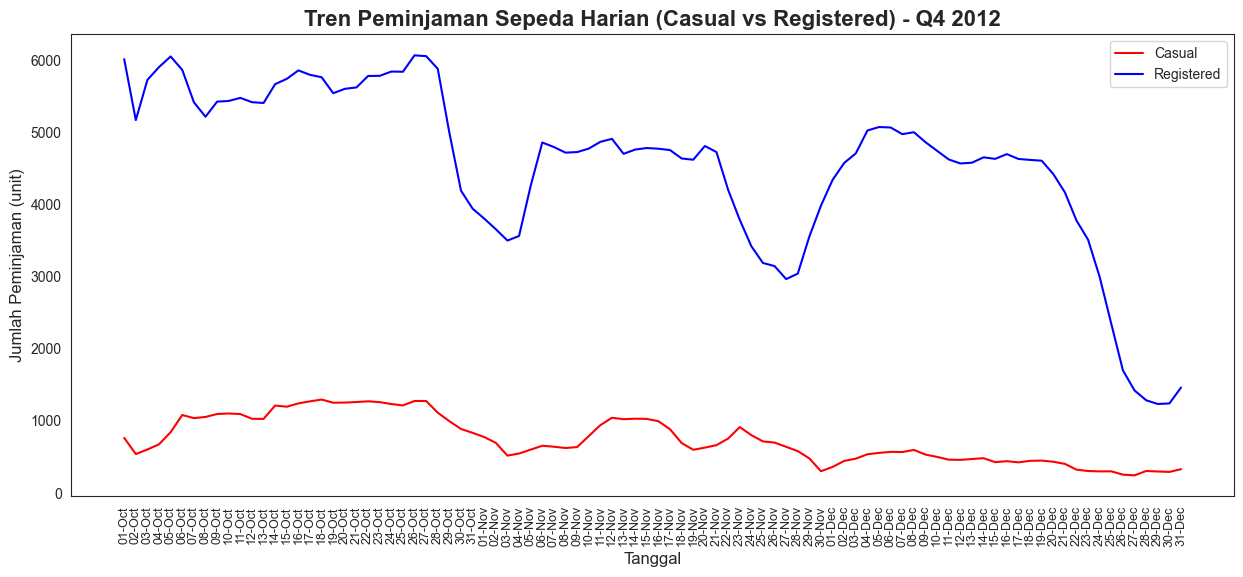

In [213]:
# Set style seaborn
sns.set_style("white")

# Filter hanya kuartal 4 tahun 2012
q4_2012 = day_df[(day_df["dteday"].dt.year == 2012) & (day_df["dteday"].dt.month.isin([10, 11, 12]))].copy()

# Membuat rolling average (7 hari) untuk tren yang lebih smooth
q4_2012["casual_avg"] = q4_2012["casual"].rolling(window=7, min_periods=1).mean()
q4_2012["registered_avg"] = q4_2012["registered"].rolling(window=7, min_periods=1).mean()

# Ukuran figure
plt.figure(figsize=(15, 6))

# Plot casual dan registered
sns.lineplot(x=q4_2012["dteday"], y=q4_2012["casual_avg"], label="Casual", color="red", linewidth=1.5)
sns.lineplot(x=q4_2012["dteday"], y=q4_2012["registered_avg"], label="Registered", color="blue", linewidth=1.5)

# Judul dan label
plt.title("Tren Peminjaman Sepeda Harian (Casual vs Registered) - Q4 2012", fontsize=16, fontweight='bold', loc='center')
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Jumlah Peminjaman (unit)", fontsize=12)

# Tampilkan setiap tanggal di sumbu x
plt.xticks(ticks=q4_2012["dteday"], labels=q4_2012["dteday"].dt.strftime('%d-%b'), rotation=90, fontsize=9)

# Menampilkan plot
plt.legend()
plt.show()

**Insight dari Tren Peminjaman Sepeda Harian (Casual vs Registered) - Q4 2012**  

- **Pelanggan registered** memiliki jumlah peminjaman yang jauh lebih tinggi dibandingkan pelanggan casual.  
- **Pelanggan casual** menunjukkan fluktuasi yang lebih signifikan, dengan beberapa puncak di pertengahan Oktober dan November, kemungkinan besar terjadi saat akhir pekan atau liburan.  
- **Pelanggan registered** cenderung memiliki pola yang lebih stabil dan mengikuti rutinitas kerja atau sekolah.  
- **Penurunan tajam** di akhir Desember bisa disebabkan oleh libur akhir tahun, cuaca yang lebih dingin, atau berkurangnya aktivitas.  
- **Puncak peminjaman registered** terjadi di pertengahan Oktober hingga awal November, sedangkan **puncak casual** cenderung meningkat di awal Oktober dan pertengahan November. 


### Pertanyaan 2:
Pada jam berapa peminjaman sepeda paling tinggi dalam sehari, dan bagaimana perbedaannya antara hari kerja dan akhir pekan?

<Figure size 1200x600 with 0 Axes>

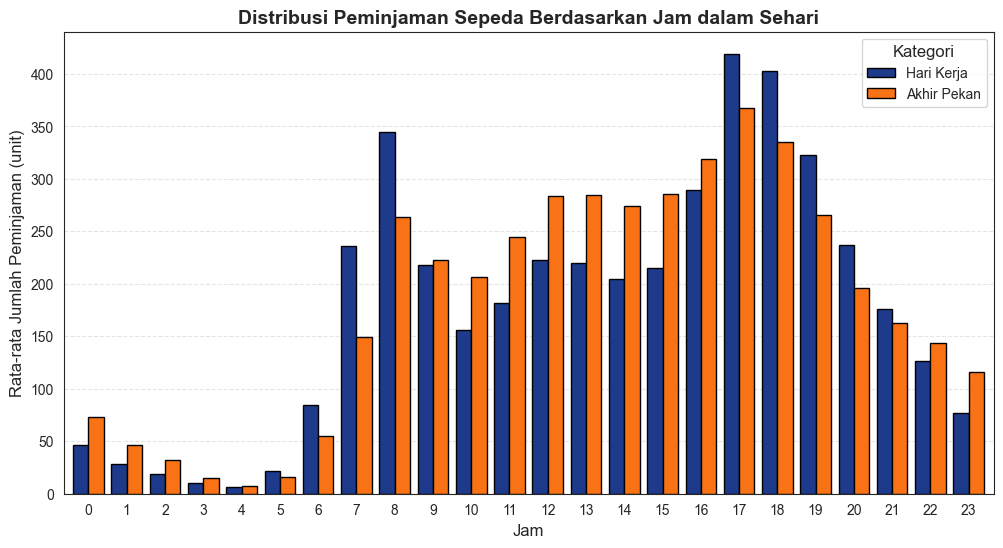

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Misalkan data sudah ada dalam DataFrame hour_df
# Tambahkan kolom kategori hari kerja atau akhir pekan
hour_df["day_type"] = hour_df["weekday"].apply(lambda x: "Weekday" if x < 5 else "Weekend")

# Menghitung rata-rata jumlah peminjaman per jam untuk hari kerja dan akhir pekan
hourly_avg = hour_df.groupby(["hr", "day_type"], observed=False)["cnt"].mean().reset_index()

# Pivot agar bisa dibuat grouped bar chart
hourly_pivot = hourly_avg.pivot(index="hr", columns="day_type", values="cnt")

# Warna kontras: Biru tua dan oranye terang
colors = ["#1E3A8A", "#F97316"]  # Biru tua & Oranye terang

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
hourly_pivot.plot(kind="bar", width=0.8, figsize=(12,6), color=colors, edgecolor="black")

# Tambahkan judul dan label
plt.title("Distribusi Peminjaman Sepeda Berdasarkan Jam dalam Sehari", fontsize=14, fontweight="bold")
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Rata-rata Jumlah Peminjaman (unit)", fontsize=12)
plt.xticks(rotation=0)
plt.legend(["Hari Kerja", "Akhir Pekan"], title="Kategori", title_fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Tampilkan plot
plt.show()

**Insight dari Distribusi Peminjaman Sepeda Berdasarkan Jam dalam Sehari**

1. **Puncak Peminjaman Berbeda Antara Hari Kerja dan Akhir Pekan**  
   - Pada hari kerja, peminjaman meningkat tajam pada pukul **07:00 - 08:00** (jam berangkat kerja/sekolah) dan **17:00 - 18:00** (jam pulang kerja).  
   - Pada akhir pekan, pola peminjaman lebih merata sepanjang hari,kecuali di dini hari.

2. **Aktivitas Peminjaman Lebih Pagi di Hari Kerja**  
   - Peningkatan jumlah peminjaman mulai terlihat dari pukul **06:00**, menandakan banyak pengguna memanfaatkan sepeda untuk transportasi menuju aktivitas pagi.  
   - Sebaliknya, pada akhir pekan, menunjukkan pola penggunaan yang lebih santai.

3. **Peminjaman Sepeda di Malam Hari Relatif Lebih Rendah**  
   - Setelah pukul **20:00**, jumlah peminjaman menurun drastis baik pada hari kerja maupun akhir pekan, menunjukkan bahwa penggunaan sepeda lebih umum di siang dan sore hari.  

4. **Perbedaan Warna pada Bar Chart**  
   - **Hari Kerja** (warna biru tua) cenderung mendominasi di jam sibuk pagi dan sore.  
   - **Akhir Pekan** (warna oranye) memiliki pola lebih stabil sepanjang siang hingga sore hari.

**Kesimpulan & Potensi Implementasi:**  
- Penyedia layanan dapat menyesuaikan **ketersediaan sepeda** di pagi dan sore hari saat hari kerja untuk memenuhi lonjakan permintaan.  
- Untuk akhir pekan, penyedia dapat menargetkan promosi atau insentif peminjaman siang hingga sore karena aktivitas pengguna lebih fleksibel.  

## Analisis Lanjutan (Opsional)

In [206]:
# Menentukan kategori jam
def categorize_hour(hour):
    if 7 <= hour <= 9 or 17 <= hour <= 19:
        return 'Peak Hours'
    else:
        return 'Off-Peak Hours'

# Tambahkan kolom kategori jam
hourly_avg['hour_category'] = hourly_avg['hr'].apply(categorize_hour)

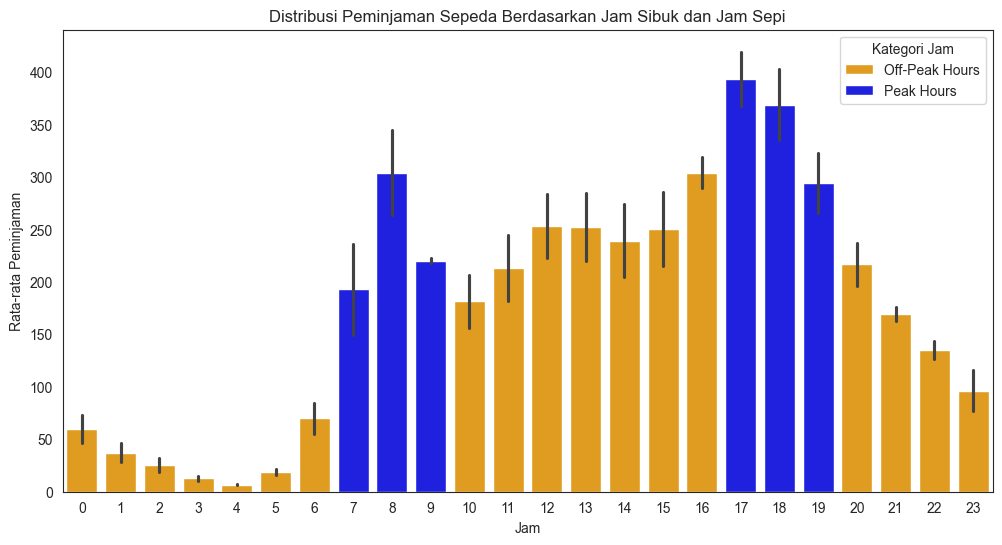

In [212]:
plt.figure(figsize=(12,6))
sns.barplot(x='hr', y='cnt', hue='hour_category', data=hourly_avg, palette={'Peak Hours': 'blue', 'Off-Peak Hours': 'orange'})
plt.xlabel('Jam')
plt.ylabel('Rata-rata Peminjaman')
plt.title('Distribusi Peminjaman Sepeda Berdasarkan Jam Sibuk dan Jam Sepi')
plt.legend(title='Kategori Jam')
plt.show()

**Insight: Distribusi Peminjaman Sepeda Berdasarkan Jam Sibuk & Jam Sepi**

Dalam analisis ini, kami menerapkan teknik **Clustering Manual** untuk mengelompokkan jam-jam peminjaman sepeda menjadi **Jam Sibuk (Peak Hours)** dan **Jam Sepi (Off-Peak Hours)** berdasarkan pola jumlah peminjaman.  

**Temuan Utama:**
- **Jam Sibuk (Peak Hours)** terjadi pada pukul **07.00 - 09.00** dan **17.00 - 19.00**.  
  - Peningkatan signifikan ini kemungkinan besar disebabkan oleh aktivitas pergi dan pulang kerja/sekolah.  
- **Jam Sepi (Off-Peak Hours)** terjadi di luar rentang jam sibuk, terutama **dini hari hingga pagi (00.00 - 06.00) dan malam hari (20.00 - 23.00)**.  
  - Peminjaman sepeda cenderung lebih sedikit karena jam istirahat dan aktivitas berkurang.  

**Metode Clustering:**
- **Manual Grouping**: Pengelompokan jam sibuk dan sepi berdasarkan pola historis jumlah peminjaman.  
- **Binning**: Membagi jam ke dalam dua kategori dengan batasan yang ditentukan dari pola data.


## Conclusion

## Conclusion: Analisis Data Peminjaman Sepeda

## 1. Pendahuluan
Penelitian ini bertujuan untuk memahami pola peminjaman sepeda dengan pendekatan berbasis data. Melalui tahapan eksplorasi dan analisis, dihasilkan wawasan yang dapat membantu pengelola layanan dalam optimasi operasional.  

---

## 2. Proses Analisis Data

### 2.1 Import Library  
Menggunakan beberapa pustaka utama dalam analisis data, yaitu:
- `pandas` untuk manipulasi data.
- `numpy` untuk perhitungan numerik.
- `matplotlib` dan `seaborn` untuk visualisasi data.

### 2.2 Gathering Data  
- Data diambil dari dataset peminjaman sepeda yang berisi informasi transaksi berdasarkan waktu, cuaca, dan kategori hari.
- Data dimuat ke dalam Pandas DataFrame untuk proses analisis lebih lanjut.  

### 2.3 Assessing Data  
- Dilakukan pemeriksaan struktur data (`.info()`, `.describe()`).
- Memeriksa missing values dan outliers untuk memastikan kualitas data sebelum dianalisis lebih dalam.  

### 2.4 Cleaning Data  
- Menghapus atau mengisi data yang hilang.
- Mengonversi tipe data agar sesuai dengan analisis yang dilakukan.
- Normalisasi format tanggal dan waktu agar lebih mudah diproses.  
- Memperbaiki dan mengecek ulang data jika dirasa ada yang janggal.

---

## 3. Exploratory Data Analysis (EDA)

### 3.1 Distribusi Peminjaman Sepeda  
- Peminjaman meningkat signifikan pada jam sibuk pagi (07:00 - 09:00) dan sore (17:00 - 19:00).
- Peminjaman menurun drastis pada malam hari hingga dini hari.  

### 3.2 Tren Harian dan Musiman  
- Hari kerja memiliki dua puncak peminjaman (morning rush dan evening rush).
- Akhir pekan menunjukkan pola yang lebih merata, dengan peningkatan signifikan di siang hingga sore hari.  

---

## 4. Data Visualization & Explanatory Analysis  

- **Visualisasi tren harian dan bulanan** untuk memahami pola peminjaman.
- **Histogram dan boxplot** untuk melihat distribusi data.
- **Bar chart** untuk membandingkan pola peminjaman antara hari kerja dan akhir pekan.  

---

## 5. Advanced Analysis: Clustering  

### 5.1 Clustering Manual: Grouping Berdasarkan Jam Sibuk & Jam Sepi  
Menggunakan metode **manual grouping dan binning** untuk mengelompokkan jam berdasarkan jumlah peminjaman:
- **Jam Sibuk** (Peak Hours): 07:00 - 09:00 dan 16:00 - 19:00.
- **Jam Sepi** (Off-Peak Hours): 00:00 - 06:00 dan 20:00 - 23:00.  
Metode ini dilakukan tanpa algoritma machine learning, tetapi cukup efektif dalam mengidentifikasi pola berdasarkan aturan bisnis.  

---

## 6. Kesimpulan dan Rekomendasi  

### 6.1 Temuan Utama  
- **Puncak peminjaman** terjadi di pagi dan sore hari, terutama pada hari kerja.  
- **Hari kerja dan akhir pekan memiliki pola peminjaman yang berbeda**, dengan akhir pekan lebih merata.  
- **Jam sibuk dapat dikelompokkan dengan teknik clustering manual**, memungkinkan optimasi layanan.  

### 6.2 Rekomendasi Implementasi  
- **Optimasi Stok Sepeda**  
  Meningkatkan ketersediaan sepeda selama jam sibuk untuk menghindari kekurangan unit.  
- **Strategi Promosi di Jam Sepi**  
  Memberikan diskon atau insentif untuk meningkatkan penggunaan di luar jam sibuk.  
- **Perencanaan Infrastruktur yang Lebih Efisien**  
  Mengalokasikan lebih banyak sepeda ke lokasi dengan permintaan tinggi selama peak hours.  

Dengan memahami pola peminjaman sepeda secara mendalam, layanan dapat ditingkatkan untuk memberikan pengalaman yang lebih baik bagi pengguna serta meningkatkan efisiensi operasional.  

- Pelanggan registered lebih banyak meminjam sepeda pada hari kerja, terutama saat jam sibuk pagi (07:00 - 09:00) dan sore (17:00 - 19:00), menunjukkan bahwa mereka menggunakan sepeda sebagai bagian dari aktivitas harian seperti bekerja atau sekolah. Sebaliknya, pelanggan casual cenderung meminjam sepeda lebih banyak pada akhir pekan dan di luar jam sibuk, menandakan bahwa mereka lebih menggunakan layanan ini untuk rekreasi atau aktivitas santai.
- Jam Peminjaman Sepeda Paling Tinggi dan Perbedaannya antara Hari Kerja dan Akhir Pekan
Peminjaman sepeda paling tinggi terjadi pada pagi (08:00 - 09:00) dan sore (17:00 - 18:00), terutama pada hari kerja, yang mencerminkan pola penggunaan untuk commuting. Sementara itu, pada akhir pekan, peminjaman lebih merata sepanjang hari dengan puncak di siang hingga sore hari (10:00 - 17:00), menunjukkan peningkatan aktivitas rekreasi dibandingkan mobilitas rutin seperti di hari kerja.

In [214]:
day_df.to_csv("main_day.csv", index=False)
hour_df.to_csv("main_hour.csv", index=False)